In [1]:
# Improting necessary libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
#original path of the dataset
input_dir = '/content/drive/MyDrive/Cat_dogs_dataset'

In [3]:
#sub_folder of the original dataset
categories = ['/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats','/content/drive/MyDrive/Cat_dogs_dataset/dogs-20240310T105423Z-001/dogs']
for category in categories:
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path = os.path.join(input_dir,category,file)
    print(img_path)

/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.115.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.114.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.112.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.111.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.113.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.11.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.110.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.108.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.107.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.105.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.102.jpg
/content/drive/MyDrive/Cat_dogs_dataset/cats-20240312T074925Z-001/cats/cat.104.jpg
/cont

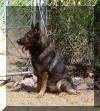

In [4]:
Image.open('/content/drive/MyDrive/Cat_dogs_dataset/dogs-20240310T105423Z-001/dogs/dog.561.jpg')

In [5]:
img_path = '/content/drive/MyDrive/Cat_dogs_dataset/dogs-20240310T105423Z-001/dogs/dog.561.jpg'

In [6]:
# converting an image to numpy array
img = imread(img_path)
print(img)

[[[185 203 161]
  [164 182 144]
  [174 190 164]
  ...
  [ 81  99  61]
  [ 75  93  55]
  [108 126  88]]

 [[153 171 129]
  [196 214 176]
  [208 224 198]
  ...
  [ 60  78  40]
  [ 38  56  18]
  [ 55  73  35]]

 [[150 171 128]
  [201 222 183]
  [169 187 161]
  ...
  [ 44  60  24]
  [ 18  34   0]
  [ 25  41   5]]

 ...

 [[233 231 234]
  [255 254 255]
  [252 246 246]
  ...
  [ 99  97  74]
  [101  99  76]
  [108 106  83]]

 [[255 253 255]
  [228 222 226]
  [255 252 255]
  ...
  [ 89  91  67]
  [ 95  95  71]
  [102 104  80]]

 [[255 247 255]
  [250 239 245]
  [117 106 110]
  ...
  [105 109  82]
  [109 112  85]
  [117 121  94]]]


In [7]:
img = resize(img,(10,10))
img

array([[[0.66220749, 0.73067233, 0.65759182],
        [0.52616396, 0.59104944, 0.44292107],
        [0.51158804, 0.5689868 , 0.41424135],
        [0.54418512, 0.58514675, 0.52961202],
        [0.45335527, 0.48356859, 0.4455311 ],
        [0.38161111, 0.38564222, 0.28027904],
        [0.41634841, 0.43163191, 0.28252968],
        [0.4227232 , 0.42989767, 0.27646314],
        [0.35854012, 0.38561846, 0.23699951],
        [0.28174184, 0.3293343 , 0.2039355 ]],

       [[0.64275017, 0.68892162, 0.63145639],
        [0.42687159, 0.46407481, 0.37774533],
        [0.38227055, 0.41447848, 0.32976146],
        [0.37996142, 0.39927234, 0.36773654],
        [0.37134403, 0.38530095, 0.35487948],
        [0.25975281, 0.2683451 , 0.17776975],
        [0.30747454, 0.32976847, 0.20592138],
        [0.29757458, 0.32048632, 0.19115563],
        [0.26076432, 0.29398582, 0.16401642],
        [0.17239026, 0.20064536, 0.10926442]],

       [[0.70999457, 0.71099931, 0.66859973],
        [0.50441618, 0.5032579

In [8]:
#flattening the image
img = img.flatten()
img

array([0.66220749, 0.73067233, 0.65759182, 0.52616396, 0.59104944,
       0.44292107, 0.51158804, 0.5689868 , 0.41424135, 0.54418512,
       0.58514675, 0.52961202, 0.45335527, 0.48356859, 0.4455311 ,
       0.38161111, 0.38564222, 0.28027904, 0.41634841, 0.43163191,
       0.28252968, 0.4227232 , 0.42989767, 0.27646314, 0.35854012,
       0.38561846, 0.23699951, 0.28174184, 0.3293343 , 0.2039355 ,
       0.64275017, 0.68892162, 0.63145639, 0.42687159, 0.46407481,
       0.37774533, 0.38227055, 0.41447848, 0.32976146, 0.37996142,
       0.39927234, 0.36773654, 0.37134403, 0.38530095, 0.35487948,
       0.25975281, 0.2683451 , 0.17776975, 0.30747454, 0.32976847,
       0.20592138, 0.29757458, 0.32048632, 0.19115563, 0.26076432,
       0.29398582, 0.16401642, 0.17239026, 0.20064536, 0.10926442,
       0.70999457, 0.71099931, 0.66859973, 0.50441618, 0.50325792,
       0.43672772, 0.41396443, 0.40618901, 0.35104526, 0.30491263,
       0.27571496, 0.24342992, 0.38796826, 0.37484267, 0.34010

In [9]:
# creating two empty list as data and labels
data = []
labels = []

In [10]:
for category_idx , category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path  = os.path.join(input_dir,category,file)
    img = resize(img,(10,10))
    data.append(img.flatten())
    labels.append(category_idx)

In [11]:
labels = np.asarray(labels)
data = np.asarray(data)

In [12]:
# logistic Regression model
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2,shuffle = True,stratify = labels)

In [13]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

In [14]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [15]:
accuracy_score(y_test,y_pred)

0.5

In [16]:
#Decision Tree
decision = DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_pred_dec = decision.predict(x_test)
y_pred_dec


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
accuracy_score(y_test,y_pred_dec)

0.5

In [18]:
#Random Forest
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
accuracy_score(y_test,y_pred_rfc)

0.5

In [20]:
# Hyperparameter Tuning-Random forest
rf = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators' : [200,500],
    'max_features' : ['auto','sqrt','log2'],
    'max_depth'    : [4,5,6,7,8],
    'criterion'    : ['gini','entropy']
}

cv_rf = GridSearchCV(estimator = rf ,param_grid = param_grid,cv = 5)
cv_rf.fit(x_train,y_train)
cv_rf.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [21]:
#printing the best hyperparameters
cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [22]:
# predictin values using random forest with hyperparameter tuning
rfc_1 = RandomForestClassifier(random_state=42,max_features='auto',n_estimators=200,max_depth=8 , criterion= 'gini')
rfc_1.fit(x_train,y_train)
y_pred_rfc_1 = rfc_1.predict(x_test)
print('accuracy for random forest on hyperparameter tuning data : ',accuracy_score(y_test,y_pred_rfc_1))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


accuracy for random forest on hyperparameter tuning data :  0.5


In [25]:
pd.DataFrame({'Actual_value' : y_test , 'predicted_values' : y_pred_rfc_1})

,Actual_value,predicted_values
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
395,1,0
396,1,0
397,0,0
398,1,0
